In [1]:
import pandas as pd
import numpy as np

In [2]:
features = pd.read_csv('../data/raw/features_data_set.csv')
sales = pd.read_csv('../data/raw/sales_data_set.csv')
stores = pd.read_csv('../data/raw/stores_data_set.csv')

In [3]:
print(f' Intancias de features dataset {features.shape}','\n',
      f'Intancias de sales dataset {sales.shape}', '\n',
      f'Intancias de stores dataset {stores.shape}')

 Intancias de features dataset (8190, 12) 
 Intancias de sales dataset (421570, 5) 
 Intancias de stores dataset (45, 3)


In [4]:
sales['Date'] =  pd.to_datetime(sales.Date, dayfirst=True)
sales = sales.sort_values(by=['Date'], ascending=True)

In [5]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
277665,29,5,2010-02-05,15552.08,False
277808,29,6,2010-02-05,3200.22,False
277951,29,7,2010-02-05,10820.05,False
278094,29,8,2010-02-05,20055.64,False


In [9]:
sales.groupby('Date').agg({'Weekly_Sales':'sum'})

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


In [23]:
sales_copy = (sales
              .groupby('Date')
              .agg({'Weekly_Sales':'sum'})
              .rename(columns={'Weekly_Sales':'weekly_wales_total'}))

In [25]:
sales_copy = (sales
              .groupby('Date')
              .agg({'Weekly_Sales':'sum'})
              .rename(columns={'Weekly_Sales':'weekly_wales_total'}))


stores_groups = sales.Store.unique().tolist()
dept_groups = sales.Dept.unique().tolist()
# Separate timeseries
for i in stores_groups:
    sales_store_temp = (sales
                        .query('Store == @i') # Filtrar tienda
                        .groupby(['Date']) # Agrupar por fecha
                        .agg({'Weekly_Sales':'sum'}) # Funcion de agregacion
                        .rename(columns={'Weekly_Sales':f'weekly_sales_store_{i}'}) #Renombrar columna para concatenacion
                        ) 
    
    sales_copy = sales_copy.join(sales_store_temp, how='left')

for i in dept_groups:
    sales_dept_temp = (sales
                       .query('Dept == @i')
                       .groupby(['Date'])
                       .agg({'Weekly_Sales':'sum'})
                       .rename(columns={'Weekly_Sales':f'weekly_sales_dept_{i}'})
                       )
    sales_copy = sales_copy.join(sales_dept_temp, how='left')

In [28]:
stores_columns = [f'weekly_sales_store_{i}' for i in stores_groups]
dept_columns = [f'weekly_sales_dept_{i}' for i in dept_groups]

print(np.round((sales_copy[stores_columns].sum(axis=1) - sales_copy['weekly_wales_total']).sum(axis=0)))

print(np.round((sales_copy[dept_columns].sum(axis=1) - sales_copy['weekly_wales_total']).sum(axis=0)))


0.0
-0.0


In [34]:
sales_copy.isna().sum()[sales_copy.isna().sum() > 1]

weekly_sales_dept_51     12
weekly_sales_dept_78     61
weekly_sales_dept_47      5
weekly_sales_dept_99     49
weekly_sales_dept_43    131
weekly_sales_dept_39    127
weekly_sales_dept_77    108
dtype: int64

In [53]:
features['Date'] = pd.to_datetime(features.Date, dayfirst=True)
sales['Date'] = pd.to_datetime(sales.Date, dayfirst=True)

In [59]:
features.query('Date == "2010-02-05"').head()

C:\Users\PC\AppData\Local\Temp\ipykernel_14304\1851820265.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  features.query('Date == "2010-02-05"').head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
182,2,2010-02-05,40.19,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False
364,3,2010-02-05,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,False
546,4,2010-02-05,43.76,2.598,NaN,NaN,NaN,NaN,NaN,126.442065,8.623,False
728,5,2010-02-05,39.70,2.572,NaN,NaN,NaN,NaN,NaN,211.653972,6.566,False


In [64]:
sales.query('Date == "2010-02-05"').sort_values('Store').head(20)

C:\Users\PC\AppData\Local\Temp\ipykernel_14304\177583084.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  sales.query('Date == "2010-02-05"').sort_values('Store').head(20)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
3116,1,24,2010-02-05,8272.90,False
2830,1,22,2010-02-05,13623.98,False
2973,1,23,2010-02-05,24146.49,False
3402,1,26,2010-02-05,11737.12,False
3831,1,29,2010-02-05,7024.95,False
3974,1,30,2010-02-05,5491.00,False
3545,1,27,2010-02-05,2293.00,False
3688,1,28,2010-02-05,1085.29,False
7075,1,59,2010-02-05,1409.34,False


In [56]:
sales_copy

,weekly_wales_total,weekly_sales_store_1,weekly_sales_store_29,weekly_sales_store_2,weekly_sales_store_28,weekly_sales_store_27,weekly_sales_store_31,weekly_sales_store_32,weekly_sales_store_30,weekly_sales_store_24,...,weekly_sales_dept_19,weekly_sales_dept_37,weekly_sales_dept_78,weekly_sales_dept_47,weekly_sales_dept_99,weekly_sales_dept_50,weekly_sales_dept_65,weekly_sales_dept_43,weekly_sales_dept_39,weekly_sales_dept_77
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,49750740.50,1643690.90,538634.46,2136989.46,1672352.29,1874289.79,1469252.05,1087616.19,465108.52,1388725.63,...,56493.12,66989.64,123.0,202.00,0.03,29780.00,41057.25,NaN,NaN,NaN
2010-02-12,48336677.63,1641957.44,529672.95,2137809.50,1558968.49,1745362.72,1543947.23,1123566.12,497374.57,1414107.10,...,52834.44,62013.88,93.0,1224.97,0.01,30604.00,39799.36,0.25,NaN,NaN
2010-02-19,48276993.78,1611968.17,542399.07,2124451.54,1491300.42,1945070.33,1473386.75,1082559.06,463513.26,1385362.49,...,51199.74,66267.42,41.0,584.97,8.99,36660.00,42908.44,NaN,0.78,NaN
2010-02-26,43968571.13,1409727.59,488417.61,1865097.27,1542173.33,1390934.27,1344354.41,1053247.10,472330.71,1158722.74,...,51123.83,62280.26,72.0,-432.00,NaN,28917.00,40515.35,NaN,7.02,NaN
2010-03-05,46871470.30,1554806.68,535087.91,1991013.13,1608435.45,1313729.72,1384870.51,1066566.74,472591.07,1412387.37,...,55585.32,62216.08,29.0,-926.58,0.03,35564.87,49353.20,NaN,0.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,43734899.40,1437059.26,489674.23,1746470.56,1129508.61,1540687.63,1279080.58,1157111.15,425410.04,1259278.36,...,46056.94,55999.38,NaN,-288.00,0.01,27278.20,48106.24,NaN,11.92,NaN
2012-10-05,47566639.31,1670785.97,520632.80,1998321.04,1462941.03,1591816.88,1363365.05,1202775.24,446751.45,1416720.54,...,48373.84,58392.69,NaN,174.50,11587.17,23726.48,48631.79,NaN,13.41,NaN
2012-10-12,46128514.25,1573072.81,513737.00,1900745.13,1205536.71,1660081.29,1401113.42,1176681.31,434593.26,1416301.17,...,51358.33,57846.01,NaN,-40.00,2024.93,31222.00,45354.87,NaN,14.90,125.00


In [19]:
## Matching dataset by date
max_date_sales = sales.Date.max()

new_features = features.query('Date <= @max_date_sales')

In [20]:
sales_store_grouped = sales[['Store','Weekly_Sales','Date']].groupby(['Store','Date']).agg({'Weekly_Sales':'sum'}).reset_index()

In [21]:
new_data = pd.merge(new_features, sales_store_grouped, on=['Store','Date'], how='inner')

In [22]:
mapping_type = {x.Store:x.Type for _,x in stores.iterrows()}

In [23]:
new_data['Type'] = new_features['Store'].map(mapping_type).tolist()

Ploting Sales Time Series

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

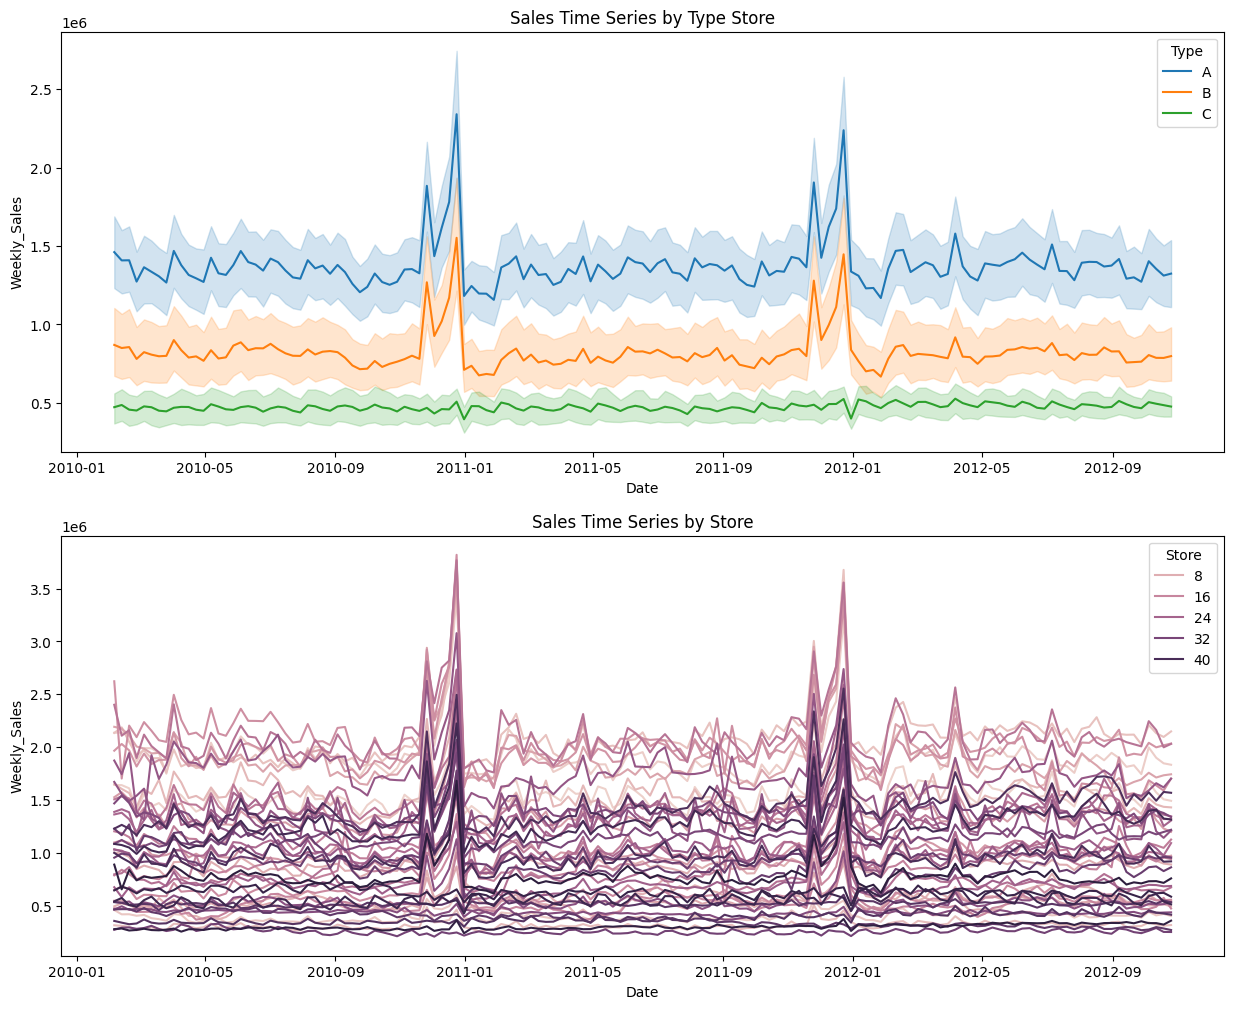

In [25]:
fig, ax = plt.subplots(2,1,figsize=(15,12))

sns.lineplot(new_data,x='Date',
             y='Weekly_Sales', hue='Type',
             ax=ax[0])

sns.lineplot(new_data,x='Date',
             y='Weekly_Sales', hue='Store',
             ax=ax[1])

ax[0].set_title('Sales Time Series by Type Store')
ax[1].set_title('Sales Time Series by Store')

plt.show()

### Outliers

In [26]:
numerical_columns = new_data.select_dtypes(include=['int','float']).drop(columns=['Store'])

In [27]:
def plot_distribution_by_column(column_name:str) -> None:

    fig,ax = plt.subplots(2,1, sharex=True)

    sns.histplot(new_data,x=column_name,
                ax=ax[0])
    sns.boxenplot(new_data,x=column_name,
                ax=ax[1], color='orange')

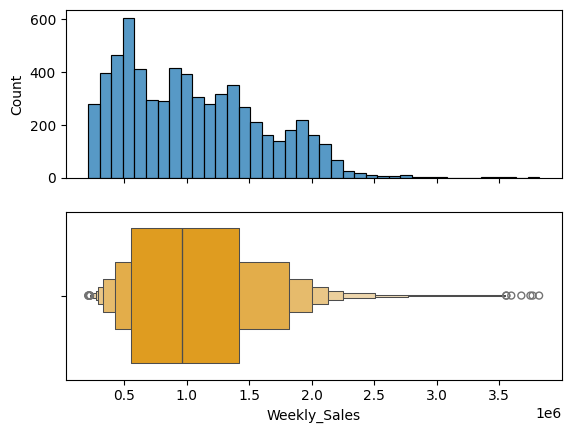

In [28]:
plot_distribution_by_column("Weekly_Sales")

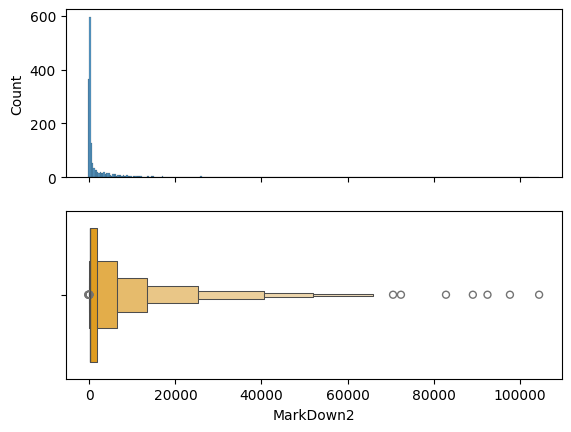

In [29]:
plot_distribution_by_column("MarkDown2")

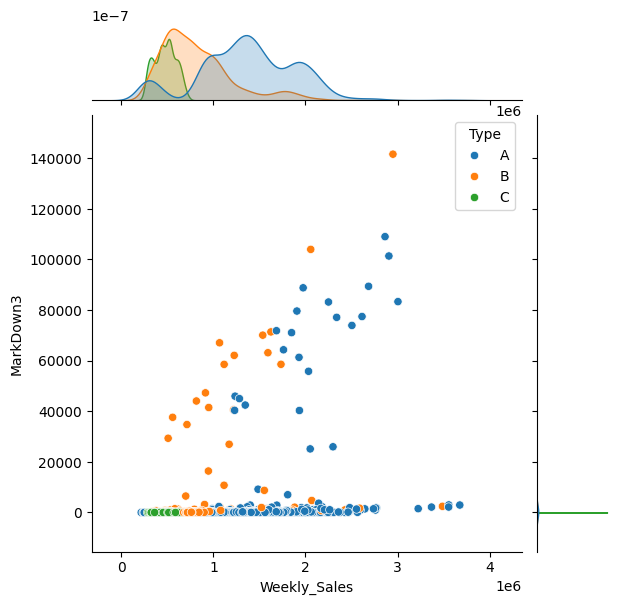

In [30]:
sns.jointplot(data=new_data, x="Weekly_Sales", y="MarkDown3",
              hue='Type')

In [31]:
print('Porcentaje de datos a existentes:')
1 - new_data.isna().mean()

Porcentaje de datos a existentes:


Store           1.000000
Date            1.000000
Temperature     1.000000
Fuel_Price      1.000000
MarkDown1       0.354312
MarkDown2       0.254390
MarkDown3       0.317949
MarkDown4       0.305361
MarkDown5       0.356643
CPI             1.000000
Unemployment    1.000000
IsHoliday       1.000000
Weekly_Sales    1.000000
Type            1.000000
dtype: float64

In [32]:
print('Porcentaje de datos a imputar:')
new_data.isna().mean()

Porcentaje de datos a imputar:


Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.645688
MarkDown2       0.745610
MarkDown3       0.682051
MarkDown4       0.694639
MarkDown5       0.643357
CPI             0.000000
Unemployment    0.000000
IsHoliday       0.000000
Weekly_Sales    0.000000
Type            0.000000
dtype: float64

Debido a la cantidad de datos faltantes y aparentes outliers, se decide eliminar esas columnas

In [33]:
new_data = new_data.drop(columns=['MarkDown1','MarkDown2','MarkDown3',
                                 'MarkDown4','MarkDown5'])

In [34]:
print(new_data.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Type'],
      dtype='object')


Analizar el tipo de variables que tenemos y cuales utilizaremos para el entrenamiento. En el proceso de feature engineering podemos encontrar feautures como:
* Future Covariates (Known/Unknow):
    + Known: Variables que se conocen con anticipación, como fechas o dias festivos
    + Unknown: Variables que no se conocen con anticipación, como el clima o la demanda, de las cuales se tendran que usar predicciones o valores retrasados (lag future values) (retardos distribuidos)
* Past Covariates
* Static Covariates

In [35]:
# Future Covariates that we actually current known
new_data['Year'] = new_data.Date.dt.year
new_data['Month'] = new_data.Date.dt.month
new_data['Day'] = new_data.Date.dt.day
new_data['IsHoliday'] = new_data['IsHoliday']*1

Pronostico Jerarquico / Hierarchical Forecast

Nuestro problema tiene una naturaleza jerarquica, debido a que debemos realizar pronosticos separados para poder pronosticar de manera agregar el total de las ventas. En este caso tenemos varias capas de pronosticos:
* Dep
* Store
* Store Type

De tal manera que nuestra jerarquia se veria de la siguiente manera:

Total Sales
    -> Store Type
        -> Store

En otras palabras la suma de las series agrupadas deber ser igual a las ventas totales.

Darts ofrece 2 formas de tratar con estos casos:
1. **Hierarchical Forecasting**: En el cual pasamos la estructura de jerarquia en la construccion de nuestra serie de tiempo
2. **Groups**: En el cual le pasamos los grupos que existen en nuestra serie, las cuales seran tomados como variables estaticas.



<Axes: xlabel='Date', ylabel='Weekly_Sales'>

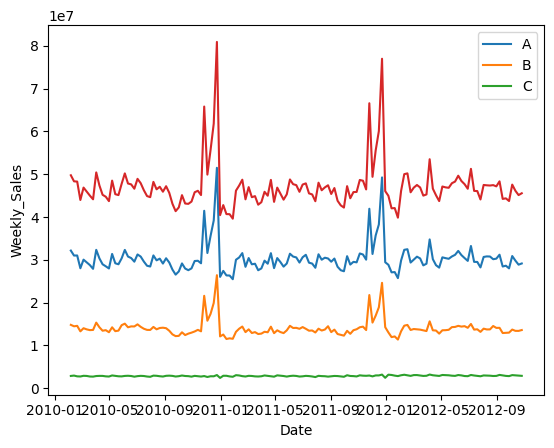

In [36]:
### Ejemplo
data_by_type = new_data.groupby(['Type','Date']).agg({'Weekly_Sales':'sum'}).reset_index()
data_by_date = new_data.groupby(['Date']).agg({'Weekly_Sales':'sum'}).reset_index()


sns.lineplot(data_by_type,
             x='Date',
             y='Weekly_Sales',
             hue='Type')

sns.lineplot(data_by_date,
             x='Date',
             y='Weekly_Sales')

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

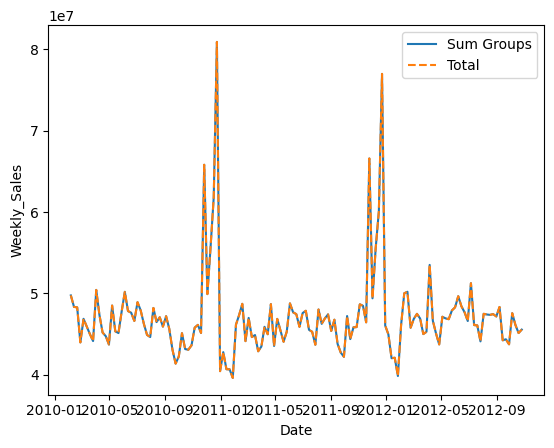

In [37]:
total_groups = (sum(data_by_type.query('Type == @t')
                    .Weekly_Sales.values for t in ['A','B','C']))

sns.lineplot(x=data_by_type.Date.drop_duplicates(),
             y=total_groups,
             label='Sum Groups')

sns.lineplot(data_by_date,
             x='Date',
             y='Weekly_Sales',
             label='Total',
             ls='--')

In [38]:
def plot_seasonality(df:pd.DataFrame,
                     target_column:str)-> None:
    
    df = df.copy()
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(df[[target_column]])

    df_scaled = pd.DataFrame(index=df.Date)
    df_scaled[target_column] = scaler.transform(df[[target_column]])
    df_scaled['day'] = pd.Categorical(df_scaled.index.day)
    df_scaled['month'] = pd.Categorical(df_scaled.index.month)

    fig, ax = plt.subplots(2,1,
                           figsize=(12,12))

    sns.boxplot(df_scaled,
                x='day',
                y=target_column,
                ax=ax[0])
    ax[0].set_title('Boxplot of Daily Seasonality')
    
    sns.boxplot(df_scaled,
                x='month',
                y=target_column,
                ax=ax[1])
    
    ax[1].set_title('Boxplot of Monthly Seasonality')

    plt.show()

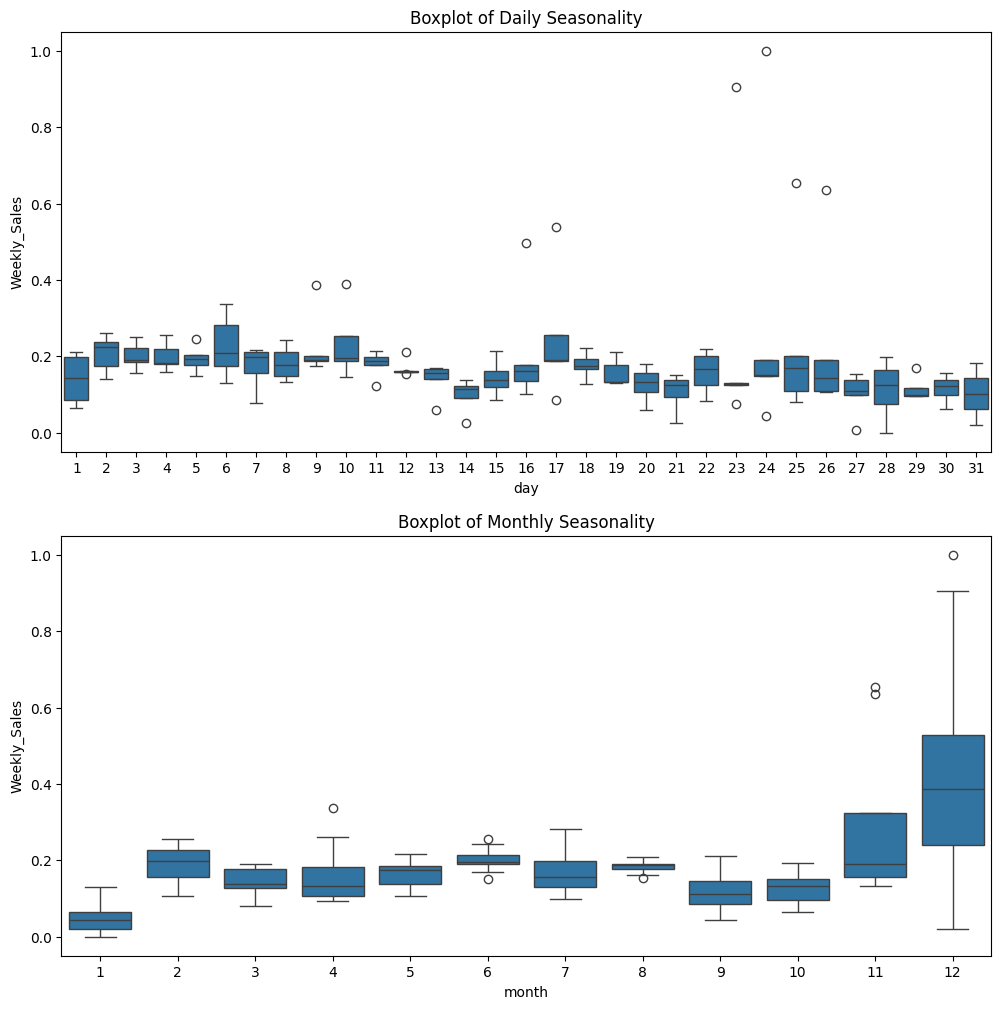

In [39]:
plot_seasonality(data_by_date,
                 'Weekly_Sales')

<Axes: xlabel='Date'>

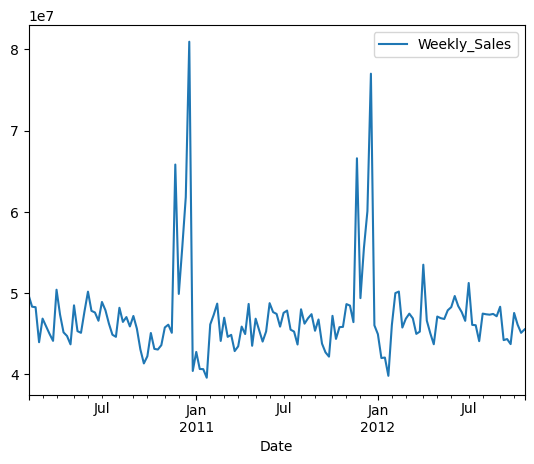

In [40]:
data_by_date.set_index('Date').plot()

In [41]:
new_data

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Type,Year,Month,Day
0,1,2010-02-05,42.31,2.572,211.096358,8.106,0,1643690.90,A,2010,2,5
1,1,2010-02-12,38.51,2.548,211.242170,8.106,1,1641957.44,A,2010,2,12
2,1,2010-02-19,39.93,2.514,211.289143,8.106,0,1611968.17,A,2010,2,19
3,1,2010-02-26,46.63,2.561,211.319643,8.106,0,1409727.59,A,2010,2,26
4,1,2010-03-05,46.50,2.625,211.350143,8.106,0,1554806.68,A,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,64.88,3.997,192.013558,8.684,0,713173.95,B,2012,9,28
6431,45,2012-10-05,64.89,3.985,192.170412,8.667,0,733455.07,B,2012,10,5
6432,45,2012-10-12,54.47,4.000,192.327265,8.667,0,734464.36,B,2012,10,12
6433,45,2012-10-19,56.47,3.969,192.330854,8.667,0,718125.53,B,2012,10,19


### Modelos globales vs modelos locales
* Modelo locales:

    Solo utilizan una serie de tiempo para realizar sus predicciones
* Modelo globales:

    Utilizan múltiples series de tiempo para realizar sus predicciones, ademas capturan la relacion entre las series, por ejemplo la como se relaciona la serie A con la serie B,C,D,etc.

In [42]:
from darts.timeseries import TimeSeries

def train_test_timeseries(y:TimeSeries,
                          future_cov:TimeSeries=None,
                          past_cov:TimeSeries=None,
                          train_size:int=0.80)-> dict:
    
    train_y, test_y = [],[]
    train_future_cov, test_future_cov = [],[]
    train_past_cov, test_past_cov = [],[]
    
    for y_single in y:
        train_y_single, test_y_single = y_single.split_before(train_size)
        train_y.append(train_y_single)
        test_y.append(test_y_single)
    for future_cov_single in future_cov:
        train_future_cov_single, test_future_cov_single = future_cov_single.split_before(train_size)
        train_future_cov.append(train_future_cov_single)
        test_future_cov.append(test_future_cov_single)
    for past_cov_single in past_cov:
        train_past_cov_single, test_past_cov_single = past_cov_single.split_before(train_size)
        train_past_cov.append(train_past_cov_single)
        test_past_cov.append(test_past_cov_single)

    return {'y_timeseries':(train_y, test_y),
            'future_cov':(train_future_cov,test_future_cov),
            'past_cov':(train_past_cov, test_past_cov)}

In [43]:
new_data['Type'] = new_data['Type'].map({'A':1,
                                 'B':2,
                                 'C':3})

In [44]:
y = TimeSeries.from_group_dataframe(new_data,
                                          group_cols=['Store','Type'],
                                          value_cols=['Weekly_Sales'],
                                          time_col='Date')

fut_cov = TimeSeries.from_group_dataframe(new_data,
                                          group_cols=['Store','Type'],
                                          value_cols=['Year','Month','Day','IsHoliday'],
                                          time_col='Date')

past_cov = TimeSeries.from_group_dataframe(new_data,
                                          group_cols=['Store','Type'],
                                          value_cols=['Temperature','Fuel_Price','CPI','Unemployment'],
                                          time_col='Date')

In [68]:
train_test_dataset = train_test_timeseries(y,
                                           fut_cov,
                                           past_cov,
                                           train_size=0.75)

In [69]:
y_train, y_test = train_test_dataset['y_timeseries']
futcov_train, futcov_test = train_test_dataset['future_cov']
pastcov_train, pastcov_test = train_test_dataset['past_cov']

<Axes: xlabel='Date'>

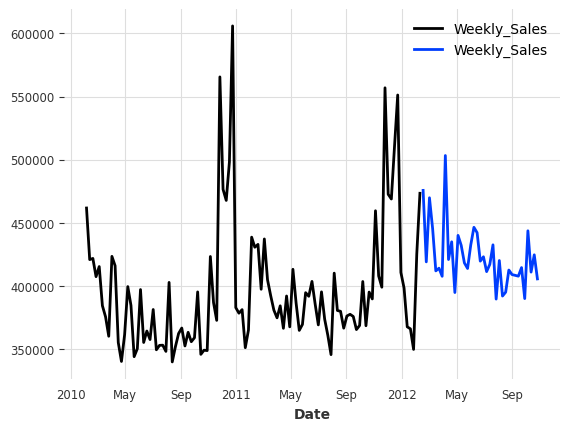

In [70]:
y_train[2].plot()
y_test[2].plot()

In [71]:
from darts.utils.statistics import plot_acf, plot_pacf

In [72]:
total_series = TimeSeries.from_dataframe(data_by_date,
                                         time_col='Date',
                                         value_cols=['Weekly_Sales'])

<Axes: xlabel='Date'>

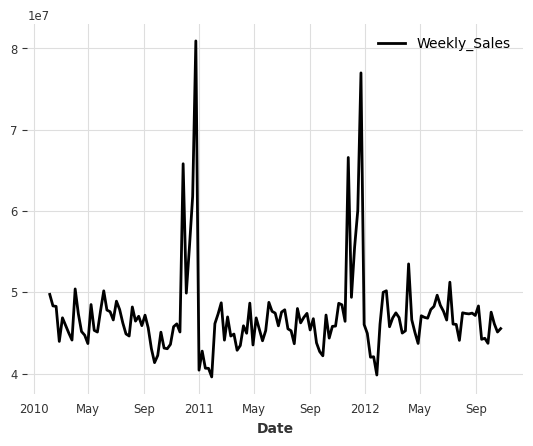

In [58]:
total_series.plot()

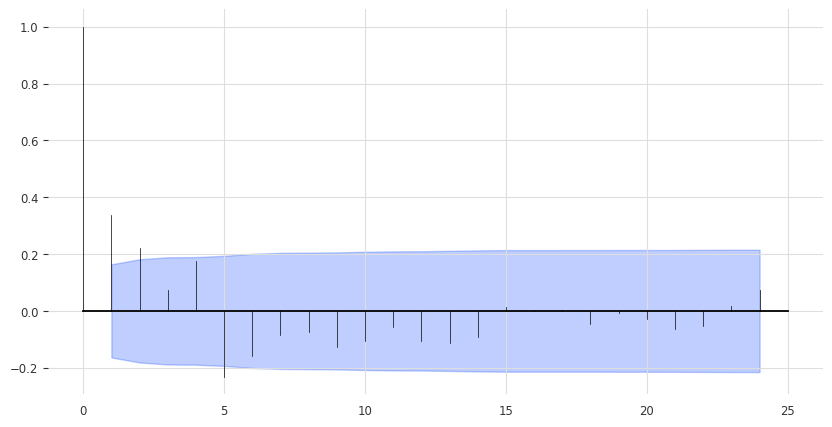

In [59]:
plot_acf(total_series)

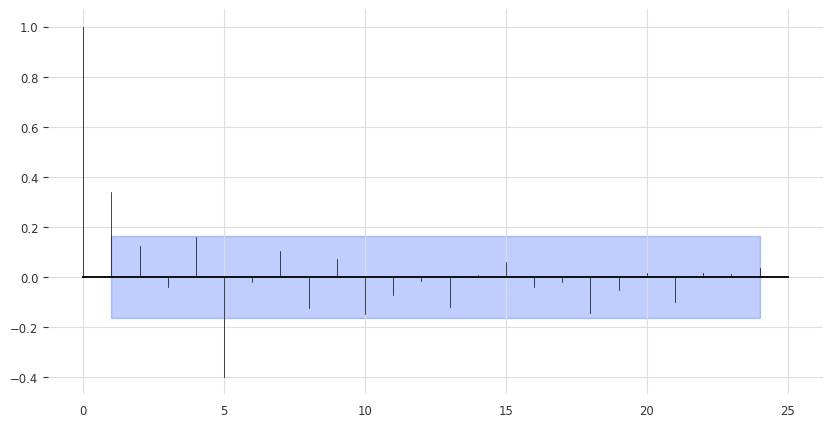

In [60]:
plot_pacf(total_series)

In [130]:
from darts.dataprocessing.transformers.scaler import Scaler
scaler_y = Scaler().fit(y_train)
scaler_futcov = Scaler().fit(futcov_train)
scaler_pastcov = Scaler().fit(pastcov_train)

y_train_scaled, y_test_scaled = scaler_y.transform(y_train), scaler_y.transform(y_test)
futcov_train_scaled, futcov_test_scaled = scaler_futcov.transform(futcov_train), scaler_futcov.transform(futcov_test)
pastcov_train_scaled, pastcov_test_scaled = scaler_pastcov.transform(pastcov_train), scaler_pastcov.transform(pastcov_train)

full_pastcov_scaled = scaler_pastcov.transform(past_cov)

In [150]:
from darts.models.forecasting.xgboost import XGBModel
from darts.models.forecasting.lgbm import LightGBMModel
from darts.dataprocessing.transformers.static_covariates_transformer import StaticCovariatesTransformer

model = XGBModel(lags=[-1,-2,-5],
                              lags_future_covariates=[0],
                              lags_past_covariates=[-1]) 

model.fit(series=y_train_scaled,
          past_covariates=pastcov_train_scaled,
          future_covariates=futcov_train_scaled)

XGBModel(lags=[-1, -2, -5], lags_past_covariates=[-1], lags_future_covariates=[0], output_chunk_length=1, output_chunk_shift=0, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True)

In [77]:
def get_overall_MAPE(prediction_series,
                     test_series):
    from darts.metrics.metrics import mape
    
    return np.round(np.mean(mape(actual_series=test_series, 
                                 pred_series=prediction_series)),2)

`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.


<Axes: xlabel='Date'>

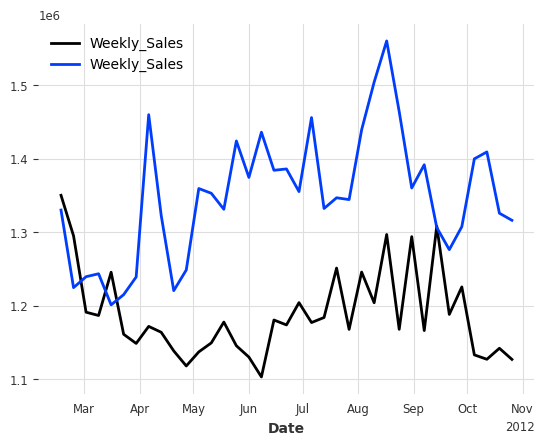

In [151]:
predictions = scaler_y.inverse_transform(model.predict(n=len(y_test[0]),
              series=y_train,
              past_covariates=full_pastcov_scaled,
              future_covariates=futcov_test))

predictions[40].plot()

y_test[40].plot()

<Axes: xlabel='Date'>

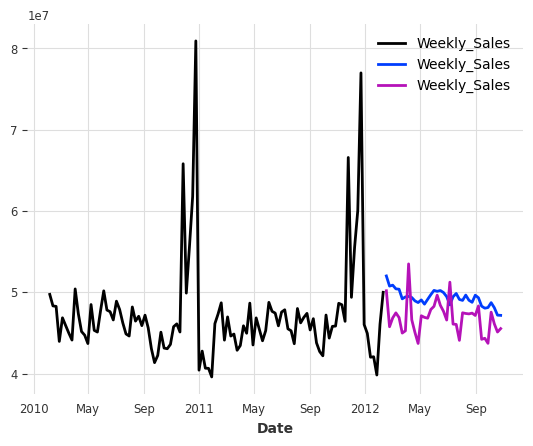

In [152]:
sum(y_train).plot()

sum(predictions).plot()
sum(y_test).plot()

In [153]:
get_overall_MAPE(prediction_series=predictions,
                 test_series=y_test) 

11.91

In [154]:
get_overall_MAPE(prediction_series=sum(predictions),
                 test_series=sum(y_test)) 

5.99

Create Model

In [115]:
from darts.models import ExponentialSmoothing, LinearRegressionModel
from darts.models.forecasting.auto_arima import AutoARIMA
from darts.models.forecasting.xgboost import XGBModel

In [162]:
hierarchical_data = pd.DataFrame()
hierarchical_data['Date'] = data_by_date.Date
hierarchical_data['total_weekly_sales'] = data_by_date.Weekly_Sales.tolist()
hierarchical_data['weekle_sales_A'] = data_by_type.query('Type == "A"').Weekly_Sales.tolist()
hierarchical_data['weekle_sales_B'] = data_by_type.query('Type == "B"').Weekly_Sales.tolist()
hierarchical_data['weekle_sales_C'] = data_by_type.query('Type == "C"').Weekly_Sales.tolist()

hierarchical_structure = {'weekle_sales_A':['total_weekly_sales'],
                          'weekle_sales_B':['total_weekly_sales'],
                          'weekle_sales_C':['total_weekly_sales']}

In [163]:
hierarchical_data_ts = TimeSeries.from_dataframe(hierarchical_data,
                                                 time_col='Date',
                                                 value_cols=['total_weekly_sales',
                                                             'weekle_sales_A',
                                                             'weekle_sales_B',
                                                             'weekle_sales_C'],
                                                             hierarchy=hierarchical_structure)

In [164]:
train, test = hierarchical_data_ts[:-37], hierarchical_data_ts[-37:]

In [177]:
from darts.models.forecasting.prophet_model import Prophet
from darts.models.forecasting.random_forest import RandomForest

from darts.dataprocessing.transformers.scaler import Scaler


In [185]:
scaler = Scaler().fit(train)

train_scaled, test_scaled = scaler.transform(train), scaler.transform(test)

In [186]:
model_hierarchical = XGBModel(lags=[-1,-2,-5])

model_hierarchical.fit(train_scaled)

XGBModel(lags=[-1, -2, -5], lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=1, output_chunk_shift=0, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True)

In [189]:
hierarchical_predictions = scaler.inverse_transform(model_hierarchical.predict(n=len(test)))

<Axes: xlabel='Date'>

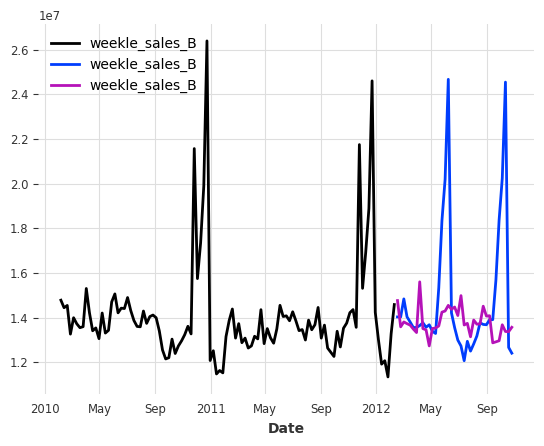

In [195]:
train['weekle_sales_B'].plot()
hierarchical_predictions['weekle_sales_B'].plot()
test['weekle_sales_B'].plot()

13:02:35 - cmdstanpy - INFO - Chain [1] start processing
13:02:35 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='Date'>

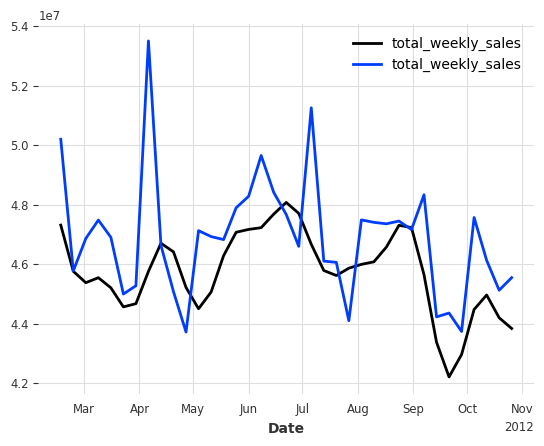

In [155]:
model_only_1ts = Prophet()
model_only_1ts.fit(train['total_weekly_sales'])

preds_1ts = model_only_1ts.predict(len(test))

preds_1ts.plot()
test['total_weekly_sales'].plot()


<Axes: xlabel='Date'>

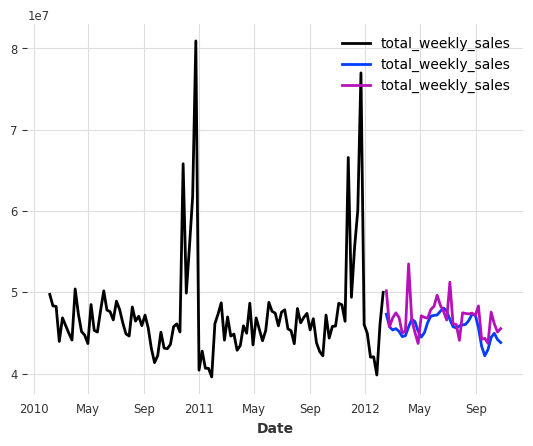

In [125]:
train['total_weekly_sales'].plot()
preds_1ts.plot()
test['total_weekly_sales'].plot()